In [1]:
from sklearn.model_selection import train_test_split #数据划分的包
# from sklearn.linear_model import LinearRegression  #线性回归的包
# from sklearn.preprocessing import StandardScaler  #归一化

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
import time

In [2]:
## 设置字符集
# 解决中文显示问题
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [4]:
#加载数据
# 日期 时间 有无功率 
path = 'datas/household_power_consumption_1000.txt'
df = pd.read_csv(path, sep = ';', low_memory=False)

#查看数据类型
df.info()
df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
Date                     1000 non-null object
Time                     1000 non-null object
Global_active_power      1000 non-null float64
Global_reactive_power    1000 non-null float64
Voltage                  1000 non-null float64
Global_intensity         1000 non-null float64
Sub_metering_1           1000 non-null float64
Sub_metering_2           1000 non-null float64
Sub_metering_3           1000 non-null float64
dtypes: float64(7), object(2)
memory usage: 70.4+ KB


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0


In [8]:
X = df.iloc[:,2:4]
Y = df.iloc[:,5]
print(X.head(2))
Y.head(2)

   Global_active_power  Global_reactive_power
0                4.216                  0.418
1                5.360                  0.436


0    18.4
1    23.0
Name: Global_intensity, dtype: float64

In [21]:
#数据分割
# help(train_test_split)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)


(800, 2)
(200, 2)


In [28]:
#将X和Y转化为矩阵的形式
X = np.mat(X_train)
Y = np.mat(Y_train).reshape(-1,1) #reshape的功能是转置
theta = (X.T*X).I*X.T*Y
print(theta)

[[ 4.20324605]
 [ 1.36676171]]


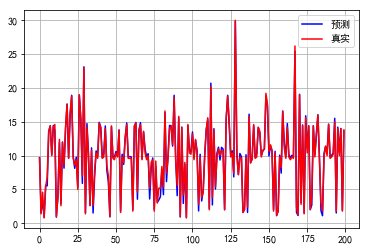

In [37]:
#对测试集合进行测试
Y_predict = np.mat(X_test)*theta

%matplotlib inline

#画图
t = np.arange(len(X_test))
# print(t)
plt.figure(facecolor='w')
plt.plot(t,Y_predict,'b-', label=u'预测值')
plt.plot(t,Y_test, 'r-', label=u'真实值')
plt.legend(['预测','真实'])
plt.grid(b=True)
plt.show()
